In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
merged_files_filtered = pd.read_csv('./data/stress_urinary_incontinence.csv')

In [3]:
merged_files_filtered.shape

(9605, 37)

In [4]:
# FOI_TEXT DATE_RECEIVED
merged_files_filtered.isnull().sum()

Unnamed: 0                           0
MDR_REPORT_KEY                       0
MDR_TEXT_KEY                         0
TEXT_TYPE_CODE                       0
PATIENT_SEQUENCE_NUMBER              0
DATE_REPORT                       6312
FOI_TEXT                             0
DEVICE_EVENT_KEY                  6312
IMPLANT_FLAG                      6312
DATE_REMOVED_FLAG                 6312
DEVICE_SEQUENCE_NO                   0
DATE_RECEIVED                        0
BRAND_NAME                         491
GENERIC_NAME                         0
MANUFACTURER_D_NAME                 27
MANUFACTURER_D_ADDRESS_1            93
MANUFACTURER_D_ADDRESS_2          6234
MANUFACTURER_D_CITY                 70
MANUFACTURER_D_STATE_CODE          910
MANUFACTURER_D_ZIP_CODE            108
MANUFACTURER_D_ZIP_CODE_EXT       6180
MANUFACTURER_D_COUNTRY_CODE         90
MANUFACTURER_D_POSTAL_CODE         108
DEVICE_OPERATOR                     82
EXPIRATION_DATE_OF_DEVICE         3710
MODEL_NUMBER             

In [4]:
category_generic_name = merged_files_filtered["GENERIC_NAME"].value_counts().rename_axis('GENERIC_NAME').reset_index(name='COUNT')

In [5]:
merged_files_filtered["GENERIC_NAME"].value_counts()

GENERIC_NAME
MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR STRESS URINARY INCONTINENCE, RETR                       6857
MESH SURGICAL FOR STRESS URINARY INCONTINENCE MALE                                                     1644
MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR STRESS URINARY INCONTINENCE, FEMA                        856
FEMALE STRESS URINARY INCONTINENCE SURGICAL MESH-SLING, SYNTHETIC POLYMER                               147
MESH, SURGICAL, FOR STRESS URINARY INCONTINENCE, MALE                                                    24
MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR STRESS URINARY INCONTINENCE                               15
MALE STRESS URINARY INCONTINENCE SURGICAL MESH-SLING, SYNTHETIC POLYMER                                  13
SURGICAL MESH FOR STRESS URINARY INCONTINENCE                                                             8
DEVICE FOR STRESS URINARY INCONTINENCE                                                                    8
MESH, SURGICAL,

In [19]:
category_generic_name.head(10)

,GENERIC_NAME,COUNT
0,"MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR...",4105
1,MESH SURGICAL FOR STRESS URINARY INCONTINENCE ...,1301
2,"MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR...",643
3,FEMALE STRESS URINARY INCONTINENCE SURGICAL ME...,167
4,"MESH, SURGICAL, FOR STRESS URINARY INCONTINENC...",24
5,MALE STRESS URINARY INCONTINENCE SURGICAL MESH...,20
6,"MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR...",11
7,DEVICE FOR STRESS URINARY INCONTINENCE,8
8,SURGICAL MESH FOR STRESS URINARY INCONTINENCE,6
9,"MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR...",6


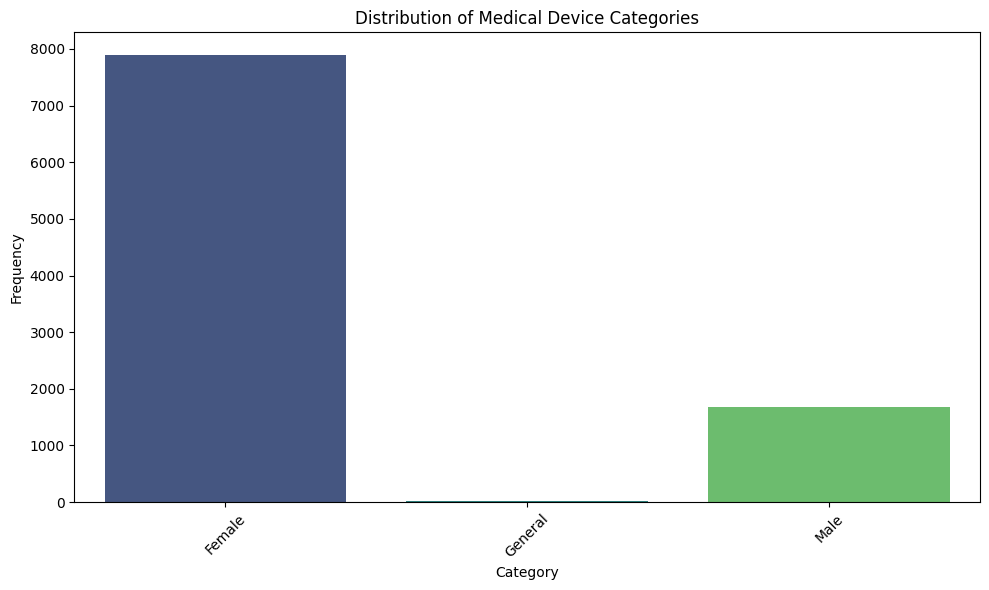

In [6]:
def categorize_generic_name(name):
    if 'FEMALE' in name or 'FEM' in name or 'UROGYNECOLOGIC' in name:
        return 'Female'
    elif 'MALE' in name:
        return 'Male'
    else:
        return 'General'

# Apply the grouping criteria
category_generic_name['Category'] = category_generic_name['GENERIC_NAME'].apply(categorize_generic_name)

# Group the data by category and sum the counts
grouped_data = category_generic_name.groupby('Category')['COUNT'].sum().reset_index()

# Plotting the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='COUNT', data=grouped_data, palette='viridis')

# Customize the plot
plt.title('Distribution of Medical Device Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
merged_files_filtered["GENERIC_CATEGORY_SEX"] = merged_files_filtered['GENERIC_NAME'].apply(categorize_generic_name)

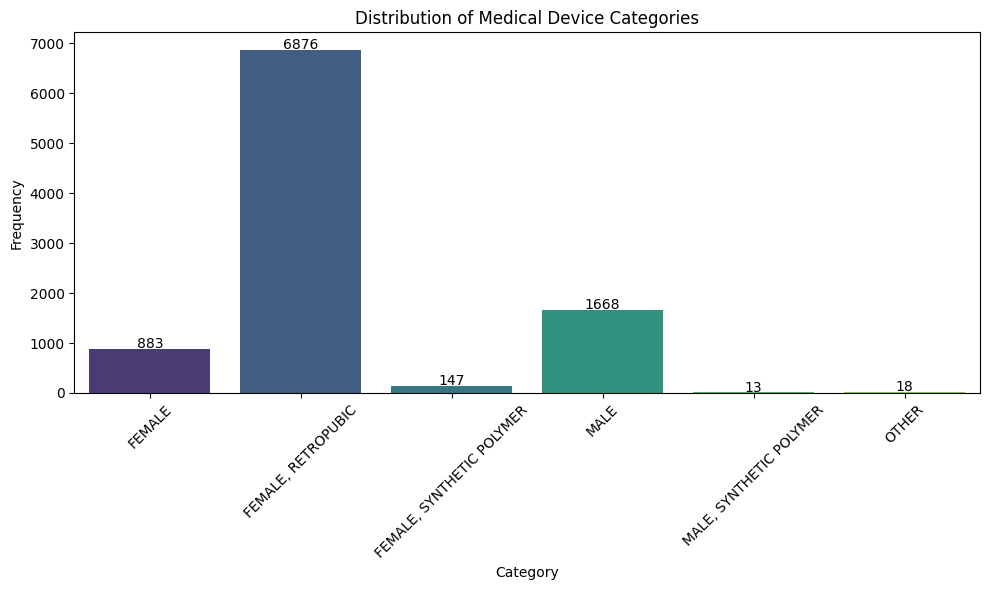

In [8]:
def categorize_generic_name_method(name):
    if 'RETR' in name or 'RET' in name or 'RETROP' in name or 'RETROPUBIC' in name:
        return 'FEMALE, RETROPUBIC'
    elif 'POLYMER' in name:
        if 'FEMALE' in name:
            return 'FEMALE, SYNTHETIC POLYMER'
        else:
            return 'MALE, SYNTHETIC POLYMER'
    elif 'UROGYNECOLOGIC' in name or 'FEMALE' in name:
        return 'FEMALE'
    elif 'MALE' in name:
        return 'MALE'
    else:
        return 'OTHER'

# Apply the grouping criteria
category_generic_name['Methods'] = category_generic_name['GENERIC_NAME'].apply(categorize_generic_name_method)

# Group the data by category and sum the counts
grouped_data = category_generic_name.groupby('Methods')['COUNT'].sum().reset_index()

# Plotting the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Methods', y='COUNT', data=grouped_data, palette='viridis')
for index, value in enumerate(grouped_data['COUNT'].values):
    plt.text(index, value+15, str(value), ha='center')

# Customize the plot
plt.title('Distribution of Medical Device Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
grouped_data

,Methods,COUNT
0,FEMALE,665
1,"FEMALE, RETROPUBIC",4119
2,"MALE, SYNTHETIC POLYMER",187
3,OTHER,1341


In [10]:
advese_events

{'Gastrointestinal': ['abdominal pain',
  'appetite decreased',
  'constipation',
  'diarrhea',
  'dyspepsia',
  'nausea',
  'vomiting',
  'gastrointestinal',
  'dry mouth'],
 'Fatigue': ['asthenia', 'drowsiness', 'somnolence', 'fatigue'],
 'Pain': ['hurt',
  'painful',
  'ache',
  'suffering',
  'intense pain',
  'severe pain',
  'misery'],
 'Urinary': ['voiding dysfunction',
  'urinary tract infection',
  'bladder infection',
  'urine leakage',
  'persistent incontinence'],
 'Device Problem': ['mesh exposure',
  'mesh migration',
  'malfunction',
  'mesh revision surgery'],
 'Infection': ['infected', 'infectious'],
 'Sleep Disorder': ['sleeplessness', 'insomnia'],
 'Mental Stress': ['anxiety',
  'depression',
  'distress',
  'strain',
  'tension',
  'worried',
  'restless',
  'nervous']}

In [116]:
events_list = [x for k,v in advese_events.items() for x in v]

In [117]:
topic_list = [k.lower() for k,v in advese_events.items()]

In [118]:
events_list.extend(topic_list)

In [106]:
('urine' in 'urine leakage')

True

In [98]:
irrelevant_words = [
    'pt', 'surgeon', 'would', 'b', 'patient', 'device', 'reported', 'procedure', 'information',
    'mesh', 'event', 'sling', 'code', 'date', 'report', 'implanted',
    'lot', 'unknown', 'complainant', 'could', 'corporation', 'analysis', 'reportable', 'physician', 'unspecified', 'number',
    'treatment', 'therefore', 'scientific', 'boston', 'block', 'also', 'additional', 'relevant', 'completed', 'upn', 'used'
    ]
# irrelevant_words = ['PATIENT', 'DEVICE', 'B']

In [5]:
merged_files_filtered['DATE_RECEIVED'] = pd.to_datetime(merged_files_filtered['DATE_RECEIVED'])

In [107]:
merged_files_filtered['DATE_RECEIVED'] = pd.to_datetime(merged_files_filtered['DATE_RECEIVED'])

# Tokenize the FOI_TEXT column
stop_words = set(stopwords.words('english'))
merged_files_filtered['tokens'] = merged_files_filtered['FOI_TEXT'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words and word.lower() not in irrelevant_words])

# Extract keywords from the tokens column
keywords = Counter()
for token_list in merged_files_filtered['tokens']:
    keywords.update(token_list)    

In [ ]:
word_tokenize("MANUFACTURER REFERENCE NUMBER: (B)(4). INCIDENT DATE WAS NOT PROVIDED. LOT NUMBER NOT PROVIDED. UDI NOT PROVIDED RE-PROCESSING INFORMATION NOT PROVIDED. SINCE THE LOT NUMBER WAS NOT PROVIDED, THIS INFORMATION CANNOT BE DETERMINE")

In [ ]:
[word.lower() for word in word_tokenize(x) if word.lower() in events_list]


In [ ]:
merged_files_filtered['DATE_RECEIVED'] = pd.to_datetime(merged_files_filtered['DATE_RECEIVED'])

# Tokenize the FOI_TEXT column
stop_words = set(stopwords.words('english'))
merged_files_filtered['tokens'] = merged_files_filtered['FOI_TEXT'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.lower() in events_list])

# Extract keywords from the tokens column
keywords = Counter()
for token_list in merged_files_filtered['tokens']:
    keywords.update(token_list)    

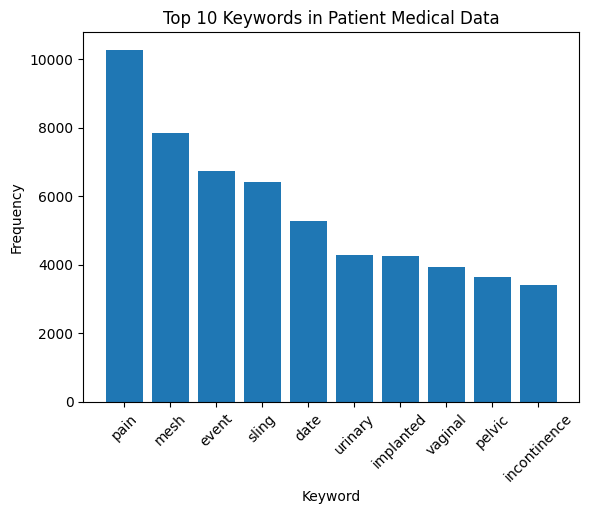

In [136]:
# Select the top 10 keywords and create a bar chart
top_keywords = dict(keywords.most_common(10))
plt.bar(top_keywords.keys(), top_keywords.values())
plt.title('Top 10 Keywords in Patient Medical Data')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [125]:
keywords.most_common(40)

[('pain', 19245),
 ('urinary', 5949),
 ('infection', 1387),
 ('prolapse', 1312),
 ('painful', 710),
 ('anxiety', 413),
 ('constipation', 398),
 ('depression', 363),
 ('tension', 282),
 ('nausea', 277),
 ('suffering', 231),
 ('fatigue', 220),
 ('vomiting', 172),
 ('diarrhea', 133),
 ('infected', 93),
 ('gastrointestinal', 83),
 ('distress', 80),
 ('infectious', 59),
 ('hurt', 49),
 ('insomnia', 37),
 ('strain', 35),
 ('nervous', 35),
 ('worried', 33),
 ('malfunction', 32),
 ('ache', 32),
 ('restless', 12),
 ('drowsiness', 6),
 ('asthenia', 4),
 ('somnolence', 2),
 ('sleeplessness', 1)]

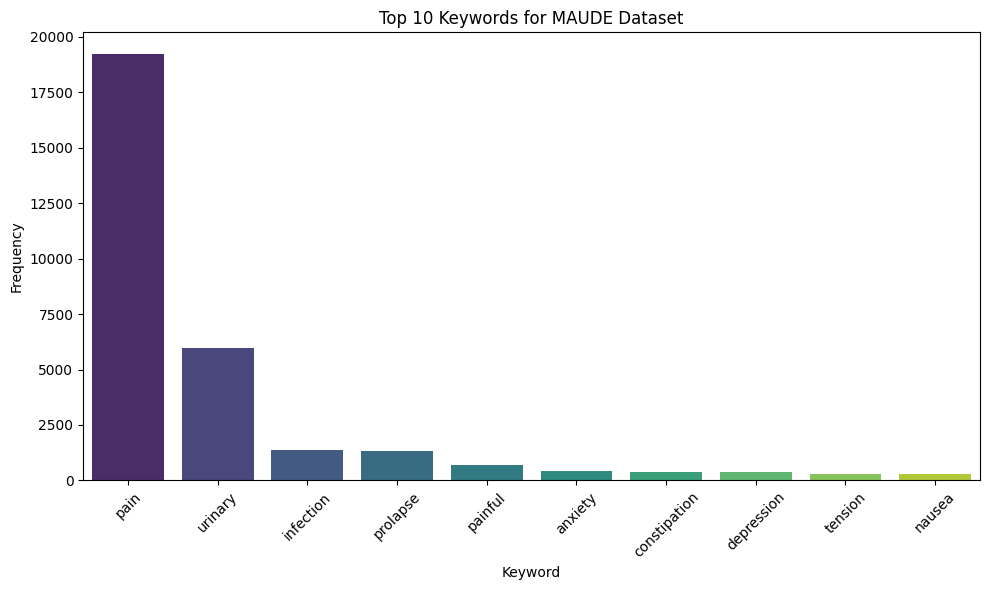

In [123]:
top_keywords = dict(keywords.most_common(10))
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_keywords.keys()), y=list(top_keywords.values()), palette='viridis')

# Customize the plot
plt.title('Top 10 Keywords for MAUDE Dataset')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [137]:
merged_files_filtered['tokens'].head()

0    [based, additional, received, complaint, medtr...
1    [based, additional, received, complaint, medtr...
2     [provided, future, supplemental, report, issued]
3    [manufacturer, reference, number, incident, da...
4    [attorney, alleged, deficiency, resulting, uns...
Name: tokens, dtype: object

In [111]:
patient_text = merged_files_filtered["tokens"].dropna()

In [112]:
mesh_text = ' '.join(str(lst) for review in patient_text for lst in review)

In [113]:
mesh_text[:20]

'prolapse urinary uri'

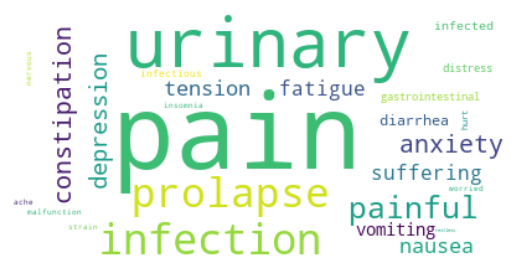

In [114]:
from wordcloud import WordCloud

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(mesh_text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [22]:
merged_files_filtered.shape

(6312, 38)

In [26]:
merged_files_filtered.head()

,Unnamed: 0,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,...,DEVICE_AVAILABILITY,DATE_RETURNED_TO_MANUFACTURER,DEVICE_REPORT_PRODUCT_CODE,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,UDI-PUBLIC,GENERIC_CATEGORY_SEX,tokens
0,106741,6383024,106903842,N,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,N,NaN,OTN,DA,N,N,NaN,NaN,Female,"[based, additional, received, complaint, medtr..."
1,106742,6383024,106903843,D,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,N,NaN,OTN,DA,N,N,NaN,NaN,Female,"[based, additional, received, complaint, medtr..."
2,144133,6383024,109652829,N,1,NaN,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...",NaN,NaN,NaN,...,N,NaN,OTN,DA,N,N,NaN,NaN,Female,"[provided, future, supplemental, report, issued]"
3,703424,6383024,69202956,N,1,NaN,MANUFACTURER REFERENCE NUMBER: (B)(4). INCIDEN...,NaN,NaN,NaN,...,N,NaN,OTN,DA,N,N,NaN,NaN,Female,"[manufacturer, reference, number, incident, da..."
4,703425,6383024,69202957,D,1,NaN,THE PATIENT'S ATTORNEY ALLEGED A DEFICIENCY AG...,NaN,NaN,NaN,...,N,NaN,OTN,DA,N,N,NaN,NaN,Female,"[attorney, alleged, deficiency, resulting, uns..."


In [31]:
# FOI_TEXT DATE_RECEIVED
merged_files_filtered['DATE_RECEIVED'].isnull().sum()

0

In [27]:
patient_file = pd.read_csv('./data/patientthru2023.zip', sep='|', quoting=3, encoding = "ISO-8859-1")

/var/folders/xt/7gvkdnw143dgfgsp73bsn11w0000gn/T/ipykernel_773/2275015965.py:1: DtypeWarning: Columns (6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  patient_file = pd.read_csv('./data/patientthru2023.zip', sep='|', quoting=3, encoding = "ISO-8859-1")


In [43]:
'PROLAPSE'.lower()

'prolapse'

In [28]:
patient_file.shape

(18104230, 10)

In [51]:
patient_file.columns

Index(['MDR_REPORT_KEY', 'PATIENT_SEQUENCE_NUMBER', 'DATE_RECEIVED',
       'SEQUENCE_NUMBER_TREATMENT', 'SEQUENCE_NUMBER_OUTCOME', 'PATIENT_AGE',
       'PATIENT_SEX', 'PATIENT_WEIGHT', 'PATIENT_ETHNICITY', 'PATIENT_RACE'],
      dtype='object')

In [59]:
patient_file[patient_file["MDR_REPORT_KEY"] == 6383024]

,MDR_REPORT_KEY,PATIENT_SEQUENCE_NUMBER,DATE_RECEIVED,SEQUENCE_NUMBER_TREATMENT,SEQUENCE_NUMBER_OUTCOME,PATIENT_AGE,PATIENT_SEX,PATIENT_WEIGHT,PATIENT_ETHNICITY,PATIENT_RACE
6093461,6383024,1,03/06/2017,NaN,O; R,NaN,NaN,NaN,NaN,NaN


In [29]:
merged_patient_files = merged_files_filtered.join(patient_file, on = 'MDR_REPORT_KEY', how = 'left', rsuffix='_patient')

In [53]:
merged_patient_files.shape

(6312, 48)

In [67]:
merged_patient_files["SEQUENCE_NUMBER_OUTCOME"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6312 entries, 0 to 6311
Series name: SEQUENCE_NUMBER_OUTCOME
Non-Null Count  Dtype 
--------------  ----- 
2258 non-null   object
dtypes: object(1)
memory usage: 49.4+ KB


In [68]:
merged_patient_files.dtypes

Unnamed: 0                                  int64
MDR_REPORT_KEY                              int64
MDR_TEXT_KEY                                int64
TEXT_TYPE_CODE                             object
PATIENT_SEQUENCE_NUMBER                     int64
DATE_REPORT                               float64
FOI_TEXT                                   object
DEVICE_EVENT_KEY                          float64
IMPLANT_FLAG                              float64
DATE_REMOVED_FLAG                         float64
DEVICE_SEQUENCE_NO                        float64
DATE_RECEIVED                      datetime64[ns]
BRAND_NAME                                 object
GENERIC_NAME                               object
MANUFACTURER_D_NAME                        object
MANUFACTURER_D_ADDRESS_1                   object
MANUFACTURER_D_ADDRESS_2                   object
MANUFACTURER_D_CITY                        object
MANUFACTURER_D_STATE_CODE                  object
MANUFACTURER_D_ZIP_CODE                   float64


In [54]:
merged_patient_files.head()

,Unnamed: 0,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,...,MDR_REPORT_KEY_patient,PATIENT_SEQUENCE_NUMBER_patient,DATE_RECEIVED_patient,SEQUENCE_NUMBER_TREATMENT,SEQUENCE_NUMBER_OUTCOME,PATIENT_AGE,PATIENT_SEX,PATIENT_WEIGHT,PATIENT_ETHNICITY,PATIENT_RACE
0,106741,6383024,106903842,N,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,106742,6383024,106903843,D,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,144133,6383024,109652829,N,1,NaN,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...",NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,703424,6383024,69202956,N,1,NaN,MANUFACTURER REFERENCE NUMBER: (B)(4). INCIDEN...,NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,703425,6383024,69202957,D,1,NaN,THE PATIENT'S ATTORNEY ALLEGED A DEFICIENCY AG...,NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
merged_patient_files[merged_patient_files["MDR_REPORT_KEY"] == 6383024]["SEQUENCE_NUMBER_OUTCOME"]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: SEQUENCE_NUMBER_OUTCOME, dtype: object

In [70]:
value_counts = merged_patient_files["PATIENT_AGE"].value_counts()

In [78]:
value_counts

PATIENT_AGE
63 YR       88
50 YR       77
58 YR       74
66 YR       74
45 YR       62
            ..
117 YR       2
33 MO        2
17 MO        2
98 YR        1
16425 DA     1
Name: count, Length: 102, dtype: int64

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Pie Chart Example')
plt.show()

In [79]:
value_counts[value_counts.index.str.contains('MO')]

PATIENT_AGE
26 MO    2
33 MO    2
17 MO    2
Name: count, dtype: int64

In [104]:
"28.000 YR".split()

['28.000', 'YR']

In [30]:
# Function to convert age to years
def convert_age_to_years(age_str):
    number, unit = age_str.split()
    number = int(float(number))
    if unit == 'YR':
        return number
    elif unit == 'MO':
        return number / 12
    elif unit == 'DA':
        return number / 365
    else:
        return np.nan

In [31]:
df = merged_patient_files[['MDR_REPORT_KEY', 'PATIENT_AGE']]

In [32]:
df_no_duplicates = df.dropna().drop_duplicates(keep='last')

In [113]:
df_no_duplicates.head(10)

,MDR_REPORT_KEY,PATIENT_AGE
10,6385690,73 YR
12,7060626,20 YR
21,6581494,58 YR
29,7116636,39 YR
35,6885243,60 YR
46,6800969,82 YR
60,6513285,59 YR
87,6344200,44 YR
90,6344078,28.000 YR
102,6347631,59 YR


In [ ]:
# df_no_duplicates['PATIENT_AGE'] = df_no_duplicates['PATIENT_AGE'].astype(str)

In [98]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2791 entries, 4 to 6311
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MDR_REPORT_KEY  2791 non-null   int64 
 1   PATIENT_AGE     2791 non-null   object
dtypes: int64(1), object(1)
memory usage: 65.4+ KB


In [34]:
# Apply the function to convert ages to years
df_no_duplicates['age_in_years'] = df_no_duplicates['PATIENT_AGE'].apply(convert_age_to_years)

# Define the age bins and labels
bins = [0, 18, 35, 55, np.inf]
labels = ["0~18 Youth", "19~35 Adults", "36~55 Middle Aged", "56+ Senior"]

# Categorize ages into bins
df_no_duplicates['age_group'] = pd.cut(df_no_duplicates['age_in_years'], bins=bins, labels=labels, right=False)

# print(df_no_duplicates)

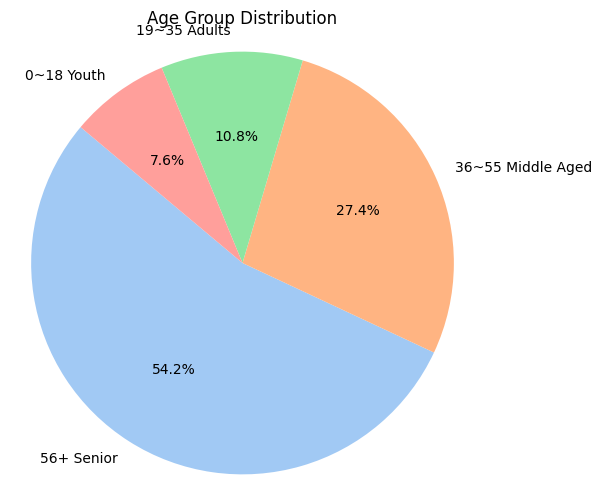

In [35]:
age_group_counts = df_no_duplicates['age_group'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Age Group Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [120]:
df_no_duplicates["age_group"].value_counts()

age_group
56+ Senior           574
36~55 Middle Aged    290
19~35 Adults         115
0~18 Youth            81
Name: count, dtype: int64

In [115]:
df['PATIENT_AGE'].unique()

array([nan, '73 YR', '20 YR', '58 YR', '39 YR', '60 YR', '82 YR', '59 YR',
       '44 YR', '28.000 YR', '72 YR', '57 YR', '36 YR', '30 YR', '61 YR',
       '63 YR', '16 YR', '31 YR', '75 YR', '66 YR', '65 YR', '7 YR',
       '45 YR', '24 YR', '54 YR', '78 YR', '83 YR', '67 YR', '69 YR',
       '68 YR', '42 YR', '77 YR', '49 YR', '40 YR', '62 YR', '53 YR',
       '64 YR', '10 YR', '46 YR', '48 YR', '43 YR', '26 YR', '84 YR',
       '22 YR', '41 YR', '47 YR', '13 YR', '8 YR', '56 YR', '74 YR',
       '52 YR', '87 YR', '117 YR', '12 YR', '51 YR', '34 YR', '89 YR',
       '92 YR', '14 YR', '23 YR', '81 YR', '4 YR', '55 YR', '76 YR',
       '35 YR', '29 YR', '71 YR', '9 YR', '19 YR', '80 YR', '5 YR',
       '38 YR', '11 YR', '28 YR', '50 YR', '32 YR', '70 YR', '16425 DA',
       '27 YR', '37 YR', '79 YR', '25 YR', '94 YR', '88 YR', '85 YR',
       '0 YR', '18 YR', '86 YR', '3 YR', '33 MO', '6 YR', '118 YR',
       '15 YR', '90 YR', '21 YR', '98 YR', '17 YR', '33 YR', '91 YR',
       '24455 

In [126]:
merged_patient_files.head()

,Unnamed: 0,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,...,MDR_REPORT_KEY_patient,PATIENT_SEQUENCE_NUMBER_patient,DATE_RECEIVED_patient,SEQUENCE_NUMBER_TREATMENT,SEQUENCE_NUMBER_OUTCOME,PATIENT_AGE,PATIENT_SEX,PATIENT_WEIGHT,PATIENT_ETHNICITY,PATIENT_RACE
0,106741,6383024,106903842,N,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,106742,6383024,106903843,D,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,144133,6383024,109652829,N,1,NaN,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...",NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,703424,6383024,69202956,N,1,NaN,MANUFACTURER REFERENCE NUMBER: (B)(4). INCIDEN...,NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,703425,6383024,69202957,D,1,NaN,THE PATIENT'S ATTORNEY ALLEGED A DEFICIENCY AG...,NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
sex_no_duplicates = merged_patient_files[['MDR_REPORT_KEY', 'PATIENT_SEX']].dropna().drop_duplicates(keep='last')
sex_no_duplicates.head()

,MDR_REPORT_KEY,PATIENT_SEX
776,7474548,Male
1080,7904766,Female
1107,7961455,Male
1136,7993630,Male
1280,8153127,Male


In [159]:
sex_no_duplicates["PATIENT_SEX"].value_counts()

PATIENT_SEX
Male                      245
Female                    233
Prefer Not To Disclose      4
Name: count, dtype: int64

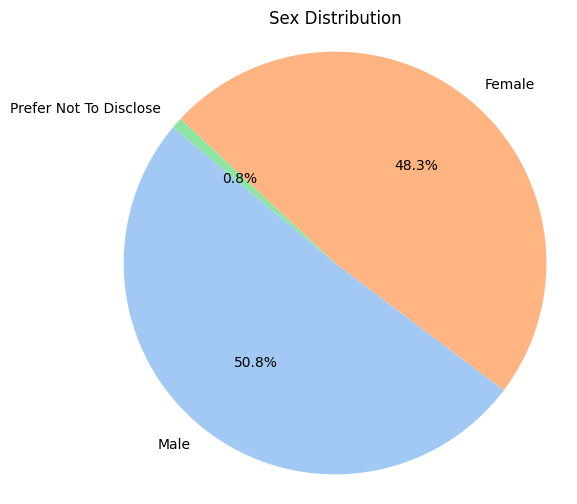

In [38]:
sex_group_counts = sex_no_duplicates['PATIENT_SEX'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sex_group_counts, labels=sex_group_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Sex Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [40]:
# GENERIC_CATEGORY_SEX
len(merged_patient_files[(merged_patient_files['GENERIC_CATEGORY_SEX'] == 'Female') & (merged_patient_files['PATIENT_SEX'].isna())])

3934

In [41]:
len(merged_patient_files[(merged_patient_files['GENERIC_CATEGORY_SEX'] == 'Male') & (merged_patient_files['PATIENT_SEX'].isna())])

1173

In [ ]:
# mesh erosion, organ perforation, mesh exposure, severe pain and re-surgery
# voiding dysfunction, dry mouth, fatigue, gastrointestinal complaints,urinary tract infections (UTI)
# 
# CNS: dizziness, Discontinue due to adverse event, Dry mouth, Fatigue: asthenia,
# Fatigue or drowsiness, Fatigue: somnolence, 
# GI: abdominal pain, GI: appetite decreased, GI: constipation, GI: diarrhea, GI: dyspepsia, GI: nausea,
# GI: vomiting, Headache, Infection, urinary tract, Sleep disorder: insomnia, Sweating, excessive, 
# Urinary: voiding dysfunction, Visual adverse effects

'dizziness, Discontinue, Dry mouth'
'Fatigue, asthenia, drowsiness, somnolence'
'GI, abdominal pain, appetite decreased, constipation, diarrhea, dyspepsia, nausea, vomiting'
'Headache, Infection'
'urinary tract, voiding dysfunction'
'Sleep disorder: insomnia'
'Sweating, excessive'
'Visual adverse effects'

The rates of overall and specific device and procedure related adverse events, such as mesh erosion, organ perforation, mesh exposure, urinary retention, and painful intercourse (dyspareunia) and the rate of re-surgeries or need for mesh removal (explantation), collected over 1-5 years of follow-up were also compared between the SUI mini-slings and the traditional mid-urethral slings as part of the SLR. The SLR demonstrated that the clinical performance of SUI mini-slings is comparable to the traditional mid-urethral slings through 5 years.

In [6]:
merged_files_filtered["FOI_TEXT"].str.contains("PAIN|INFECTION|SICK|BLEEDING|EROSION|SEVERE|DEMAGE|TIGHT|HEALTH PROBLEM|ABNORMAL|ANXIETY|NEGATIVE|DIFFICULT|ACHES|PAINFUL|DIARRHEA|BOWEL OBSTRUCTION|INCONTINENCE|DIED|BOWEL PROBLEMS|ANAL|DYSPAREUNIA|PAINfUL SEXUAL INTERCOURSE|REMOVAL|COME OUT|WEAKNESS|NUMBNESS").value_counts()

FOI_TEXT
True     3703
False    2609
Name: count, dtype: int64

In [154]:
merged_files_filtered["FOI_TEXT"].str.contains('VAGINAL LESION').sum()

6

In [155]:
'VAGINAL LESION'.lower()

'vaginal lesion'

In [39]:
advese_events = {
    "Gastrointestinal" : ["abdominal pain", "appetite decreased", "constipation", "diarrhea", "dyspepsia", "nausea", "vomiting", "gastrointestinal", "dry mouth"],
    "Fatigue": ["asthenia", "drowsiness", "somnolence", "fatigue"]
}

In [33]:
advese_events = {
    "Gastrointestinal" : ["abdominal pain", "appetite decreased", "constipation", "diarrhea", "dyspepsia", "nausea", "vomiting", "gastrointestinal", "dry mouth"],
    "Fatigue": ["asthenia", "drowsiness", "somnolence", "fatigue"],
    "Pain" : ["hurt", "painful", "ache", "suffering", "intense pain", "severe pain", "misery", "abdominal pain"],
    "Urinary": ["voiding dysfunction", "urinary tract infection", "bladder infection", "urine leakage", "persistent incontinence", "bladder neck obstruction", "urinary leakage"],
    "Device Problem": ["mesh exposure", "mesh migration", "malfunction", "mesh revision surgery"],
    "Infection": ["infected", "infectious"],
    "Sleep Disorder": ["sleeplessness", "insomnia"],
    "Mental Stress": ["anxiety", "depression", "distress", "strain", "tension", "worried", "restless", "nervous"],
    "Prolapse": ['pelvic prolapse', 'uterine prolapse', 'pelvic organ prolapse', 'terovaginal prolapse'],
    "Vaginal Issue": ['vaginal discharge', 'vaginal atrophy', 'vaginal prolapse', 'vaginal spotting', 'vaginal odor', 'vaginal lesion']  
}

In [7]:
print("{:<10} {:<10}".format('advese event', 'keywords'))
 
# print each data item.
for key, value in advese_events.items():
    print("{:<10}: {:<10}".format(key, (", ").join(value)))

advese event keywords  
Gastrointestinal: abdominal pain, appetite decreased, constipation, diarrhea, dyspepsia, nausea, vomiting, gastrointestinal, dry mouth
Fatigue   : asthenia, drowsiness, somnolence, fatigue
Pain      : hurt, painful, ache, suffering, intense pain, severe pain, misery
Urinary   : voiding dysfunction, urinary tract infection, bladder infection, urine leakage, persistent incontinence
Device Problem: mesh exposure, mesh migration, malfunction, mesh revision surgery
Infection : infected, infectious
Sleep Disorder: sleeplessness, insomnia
Mental Stress: anxiety, depression, distress, strain, tension, worried, restless, nervous


In [157]:
merged_files_filtered['Years'] = (pd.to_datetime(merged_files_filtered['DATE_RECEIVED'])).dt.year

In [7]:
merged_files_filtered['Year'] = merged_files_filtered['DATE_RECEIVED'].dt.year
merged_files_filtered['Quarter'] = merged_files_filtered['DATE_RECEIVED'].dt.quarter
merged_files_filtered['Year-Quarter'] = merged_files_filtered['Year'].astype(str) + '-Q' + merged_files_filtered['Quarter'].astype(str)

In [40]:
results = []

# Process each category
for category, keywords in advese_events.items():
    # Filter rows where 'FOI_TEXT' contains the search string
    search_string = "|".join(keywords).upper()
    filtered_rows = merged_files_filtered[merged_files_filtered['FOI_TEXT'].str.contains(search_string, case=False)]
    
    # Group by 'Year' and count the number of rows in each group
    count_by_year = filtered_rows.groupby('Year-Quarter').size().reset_index(name='Count')
    
    # Add the category to the result
    count_by_year['Category'] = category
    
    # Append the result to the list
    results.append(count_by_year)

# Combine all results into a single DataFrame
final_results = pd.concat(results, ignore_index=True)

In [43]:
[ str(x) + '-Q' + str(y) for x in [2017, 2018] for y in [1,2,3,4]]

['2017-Q1',
 '2017-Q2',
 '2017-Q3',
 '2017-Q4',
 '2018-Q1',
 '2018-Q2',
 '2018-Q3',
 '2018-Q4']

In [41]:
final_results

,Year-Quarter,Count,Category
0,2017-Q1,1,Gastrointestinal
1,2017-Q3,2,Gastrointestinal
2,2017-Q4,8,Gastrointestinal
3,2018-Q2,4,Gastrointestinal
4,2018-Q3,8,Gastrointestinal
5,2018-Q4,3,Gastrointestinal
6,2019-Q1,12,Gastrointestinal
7,2019-Q2,13,Gastrointestinal
8,2019-Q3,5,Gastrointestinal
9,2019-Q4,19,Gastrointestinal


In [ ]:
tmp = final_results['Year-Quarter'].drop_duplicates().sort_values()
tmp

In [36]:
tmp.to_list()

['2017-Q1',
 '2017-Q2',
 '2017-Q3',
 '2017-Q4',
 '2018-Q1',
 '2018-Q2',
 '2018-Q3',
 '2018-Q4',
 '2019-Q1',
 '2019-Q2',
 '2019-Q3',
 '2019-Q4',
 '2020-Q1',
 '2020-Q2',
 '2020-Q3',
 '2020-Q4',
 '2021-Q1',
 '2021-Q2',
 '2021-Q3',
 '2021-Q4',
 '2022-Q1',
 '2022-Q2',
 '2022-Q3',
 '2022-Q4',
 '2023-Q1',
 '2023-Q2',
 '2023-Q3',
 '2023-Q4']

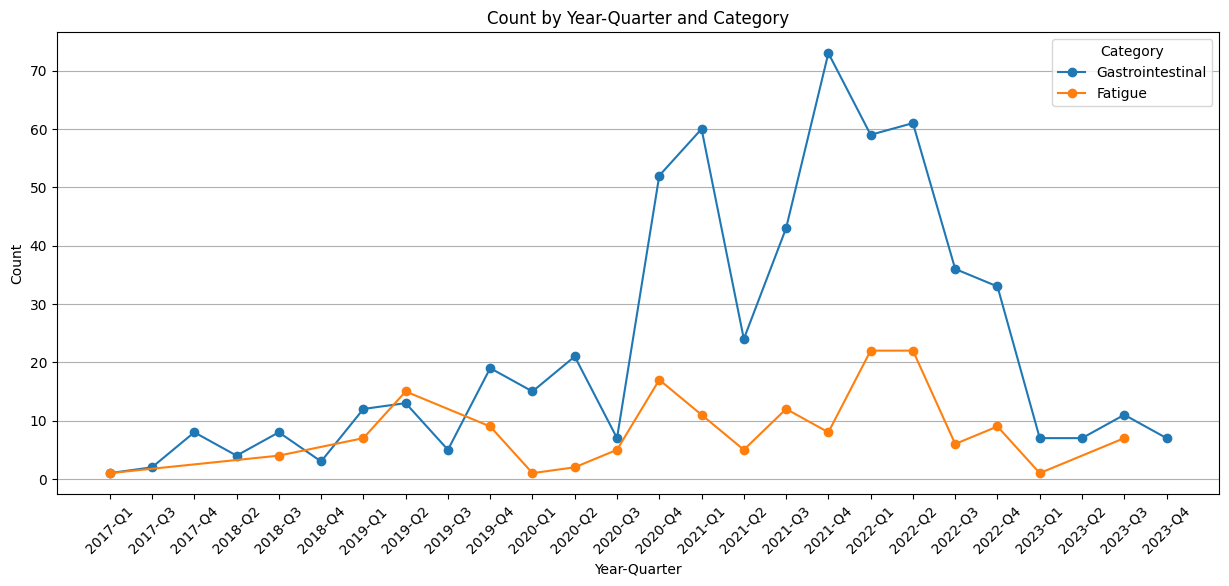

In [42]:
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(15, 6))
categories = final_results['Category'].unique()

for category in categories:
    subset = final_results[final_results['Category'] == category]
    plt.plot(subset['Year-Quarter'], subset['Count'], marker='o', label=category)

# Customize the plot
plt.title('Count by Year-Quarter and Category')
plt.xlabel('Year-Quarter')
plt.ylabel('Count')
plt.legend(title='Category')
#plt.grid(True)
plt.grid(True, axis='y')
plt.xticks(rotation=45)

# Set x-axis ticks to be integers
years = final_results['Year-Quarter'].drop_duplicates().sort_values().to_list()
plt.xticks(ticks=years, labels=[str(year) for year in years])

# Show the plot
plt.show()


In [135]:
merged_files_filtered["FOI_TEXT"].str.contains('VAGINAL DISCHARGE').sum()

314

In [168]:
"VAGINAL PROLAPSE"

'ASTHENIA|DROWSINESS|SOMNOLENCE|FATIGUE'

In [11]:
merged_files_filtered.shape

(9605, 38)

In [10]:
filtered_df = merged_files_filtered.drop_duplicates(subset=["MDR_REPORT_KEY", "FOI_TEXT"])
filtered_df.shape

(9284, 38)

In [169]:
merged_files_filtered["FOI_TEXT"].str.contains(X).sum()

128

In [54]:
"URINARY LEAKAGE".lower()

'urinary leakage'

In [46]:
'urine obstruction'.upper()

'URINE OBSTRUCTION'